# 用AI重燃亚运经典

为了助力2023届亚运会在杭州顺利召开，阿里云开发者团队联动计算平台、存储团队发起“用AI 修复亚运老照片”活动。您可参考本项目，参与修复第一届亚运会老照片，体验阿里云产品的同时为亚运助威。

活动链接：https://developer.aliyun.com/topic/aiforgames

本项目集成了开源社区优质的图像修复、去噪、上色等算法，您可根据需要进行参数调整，组合不同的处理方式来取得优异的修复结果。并在活动页面上传自己修复的图片参与评选，优胜者将获得丰厚的奖品奖励。


您可通过下列方式进行老照片修复任务（或进行组合）
- 下载所提供的项目源码/模型文件包，通过命令行运行脚本。该方式下，您可更直观的查看项目源码。

  - 已支持的开源算法：

| 功能     | 算法                    | 链接                                      |
| -------- | ----------------------- | ----------------------------------------- |
| 图像去噪   | Restormer (CVPR 2022)   | https://github.com/swz30/Restormer        |
|           | NAFNet (ECCV 2022)      | https://github.com/megvii-research/NAFNet |
| 图像超分   | RealESRGAN (ICCVW 2021) | https://github.com/xinntao/Real-ESRGAN    |
|          | SwinIR (ICCVW 2021)     | https://github.com/JingyunLiang/SwinIR    |
|          | HAT (CVPR 2023)         | https://github.com/XPixelGroup/HAT        |
| 面部增强   | CodeFormer (NeurIPS 2022)     | https://github.com/sczhou/CodeFormer    |
| 图像上色 | DDC (ICCV 2023)         | https://github.com/piddnad/DDColor        |
|          | DeOldify                | https://github.com/jantic/DeOldify        |
| 划痕修复 | LaMa  (WACV 2022)        | https://github.com/advimman/lama       |


- 基于SDWebUI，通过可视化的方式，指定超分模型或交互式进行划痕处理、局部重绘等更加精细化的操作。

  - 我们已将照片修复相关插件、模型集成进代码包。您可下载后一键使用。


    - 预置插件/模型 列表

| **插件**                          | **功能**                | **链接**                                                     |
| ----------------------------------------- | ----------------------- | ------------------------------------------------------------ |
| stable-diffusion-webui-localization-zh_CN | 页面汉化                | https://github.com/dtlnor/stable-diffusion-webui-localization-zh_CN |
| a1111-sd-webui-tagcomplete                | Tag  自动补全           | https://github.com/DominikDoom/a1111-sd-webui-tagcomplete    |
| multidiffusion-upscaler-for-automatic1111 | Diffusion/VAE的显存优化 | https://github.com/pkuliyi2015/multidiffusion-upscaler-for-automatic1111 |
| sd-webui-stablesr                         | 基于StableSR的超分      | https://github.com/pkuliyi2015/sd-webui-stablesr             |
| sd-webui-deoldify                         | 基于DeOldify的图像上色  | https://github.com/SpenserCai/sd-webui-deoldify              |
| sd-webui-controlnet                         | 	基于ControlNet的图像重绘  | https://github.com/Mikubill/sd-webui-controlnet              |


| **功能** | **模型**           |
| -------- | ------------------ |
| 超分     | 4X-UltraSharp      |
|          | BSRGAN             |
|          | ESRGAN             |
|          | Real  ESRGAN       |
|          | Real  ESRGAN Anime |
|          | ScuNet             |
|          | ScuNet  PSNR       |
|          | SwinIR  4x         |
|          | StableSR           |
| 面部增强 | GFPGAN             |
|          | CodeFormer         |
| 图像上色 | DeOldify           |
|          | DeOldify_Artistic  |
| ControlNet | canny           |
|          | depth  |
- 欢迎您基于本项目中融合更多的算法，以更好地胜任亚运老照片的修复任务。

## 1. 数据准备

我们提供了1974年我国首次参加的德黑兰亚运会的珍贵照片，您可下载并使用下列照片进行老照片修复任务。

In [1]:
# 安装工具
!apt-get update
!apt-get install unzip

Get:1 http://mirrors.cloud.aliyuncs.com/ubuntu jammy InRelease [270 kB]
Get:2 http://mirrors.cloud.aliyuncs.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://mirrors.cloud.aliyuncs.com/ubuntu jammy-backports InRelease [109 kB]
Get:4 http://mirrors.cloud.aliyuncs.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/restricted Sources [28.2 kB]
Get:6 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/main Sources [1668 kB]
Get:7 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/universe Sources [22.0 MB]
Get:8 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/multiverse Sources [361 kB]
Get:9 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/restricted amd64 Packages [164 kB]
Get:10 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/universe amd64 Packages [17.5 MB]
Get:11 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:12 http://mirrors.cloud.aliyuncs.com/ubuntu jammy/main amd64 Packages [1792 kB]
Get:13 http://mir

In [2]:
# 使用内网下载链接将加速下载
import os
def download_from_oss(url, filename):
    url_prefix = {
        "cn-shanghai": "http://pai-vision-data-sh.oss-cn-shanghai-internal.aliyuncs.com",
        "cn-hangzhou": "http://pai-vision-data-hz2.oss-cn-hangzhou-internal.aliyuncs.com",
        "cn-shenzhen": "http://pai-vision-data-sz.oss-cn-shenzhen-internal.aliyuncs.com",
        "cn-beijing": "http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com", 
    }

    dsw_region = os.environ.get("dsw_region")
    prefix = url_prefix[dsw_region] if dsw_region in url_prefix else "http://pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com"

    url = os.path.join(prefix,url,filename)
    print(url)
    print(dsw_region)
    !wget $url
    !unzip $filename
    !rm -rf $filename

In [3]:
# 下载数据并解压
download_from_oss('aigc-data/restoration/img/','input.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/img/input.zip
cn-beijing
--2023-08-23 06:38:27--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/img/input.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.8, 100.118.58.9, 100.118.58.6, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1263414 (1.2M) [application/zip]
Saving to: ‘input.zip’

input.zip           100%[===================>]   1.20M  --.-KB/s    in 0.06s   

2023-08-23 06:38:27 (18.8 MB/s) - ‘input.zip’ saved [1263414/1263414]

Archive:  input.zip
   creating: input/
  inflating: input/0.png             
  inflating: input/10.jpg            
  inflating: input/2.jpg             
  inflating: inp

（如您只想要基于WebUI在可视化界面中进行照片修复，可直接移步至SD WebUI节）

## 2. 图像推理

我们对以上开源代码进行了少量的修改、封装及预训练模型的下载，推荐您直接下载并使用修改后的代码。

您可根据模型效果自由组合所需要涉及的算法、算法执行的顺序及模型参数。 (所有算法的执行相互独立)

我们也欢迎您基于本教程进行自由开发，进一步优化老照片修复的性能。

### 2.1 图像去噪

#### Restormer:

该算法发表于CVPR2022 用于对图像进行去噪，去模糊操作。

##### 参数设置：

###### task：
    -Motion_Deblurring：去运动模糊
    -Single_Image_Defocus_Deblurring：去focus模糊
    -Deraining：去雨滴
    -Real_Denoising：真实场景去噪
    -Gaussian_Gray_Denoising：灰度图去高斯噪声
    -Gaussian_Color_Denoising：RGB图去高斯噪声

###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出路径，输出图片会以输入图一样的文件名称保存在 {result_dir}/{task}下
    
###### tile（可选）：
    -对于大图可能显存出现OOM，可采取分片推理的方式，tile值为分片图片大小


##### 快速开始：

Step1: 下载代码及预训练文件

In [4]:
download_from_oss('aigc-data/restoration/repo/','restormer.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/restormer.zip
cn-beijing
--2023-08-23 06:38:27--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/restormer.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.9, 100.118.58.8, 100.118.58.7, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2859106485 (2.7G) [application/zip]
Saving to: ‘restormer.zip’

restormer.zip       100%[===================>]   2.66G  23.4MB/s    in 1m 59s  

2023-08-23 06:40:27 (22.8 MB/s) - ‘restormer.zip’ saved [2859106485/2859106485]

Archive:  restormer.zip
   creating: Restormer/
   creating: Restormer/.ipynb_checkpoints/
  inflating: Restormer/.ipynb_checkpoints/demo-check

Step2: 安装额外的环境包

In [5]:
! pip install natsort

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


Step3: 根据需要运行合适的推理任务

In [6]:
# 去运动模糊
!python Restormer/demo.py --task Motion_Deblurring --input_dir input/ --result_dir results/ --tile 512

# 去focus模糊
!python Restormer/demo.py --task Single_Image_Defocus_Deblurring --input_dir input/ --result_dir results/  --tile 512

# 去雨滴
!python Restormer/demo.py --task Deraining --input_dir input/ --result_dir results/  --tile 512

# 真实场景去噪
!python Restormer/demo.py --task Real_Denoising --input_dir input/ --result_dir results/  --tile 512

# 灰度图去高斯噪声
!python Restormer/demo.py --task Gaussian_Gray_Denoising --input_dir input/ --result_dir results/  --tile 512

# RGB图去高斯噪声
!python Restormer/demo.py --task Gaussian_Color_Denoising --input_dir input/ --result_dir results/  --tile 512


 ==> Running Motion_Deblurring with weights /mnt/workspace/Restormer/Motion_Deblurring/pretrained_models/motion_deblurring.pth
 
100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.03s/it]

Restored images are saved at results/Motion_Deblurring

 ==> Running Single_Image_Defocus_Deblurring with weights /mnt/workspace/Restormer/Defocus_Deblurring/pretrained_models/single_image_defocus_deblurring.pth
 
100%|█████████████████████████████████████████████| 6/6 [00:09<00:00,  1.61s/it]

Restored images are saved at results/Single_Image_Defocus_Deblurring

 ==> Running Deraining with weights /mnt/workspace/Restormer/Deraining/pretrained_models/deraining.pth
 
100%|█████████████████████████████████████████████| 6/6 [00:09<00:00,  1.61s/it]

Restored images are saved at results/Deraining

 ==> Running Real_Denoising with weights /mnt/workspace/Restormer/Denoising/pretrained_models/real_denoising.pth
 
100%|█████████████████████████████████████████████| 6/6 [00:09<00:00,  1

#### NAFNet:

该算法发表于ECCV2022 用于对图像进行去噪，去模糊操作。

我们基于Modelscope实现：https://www.modelscope.cn/models?name=nafnet&page=1


##### 参数设置：

###### task：
    -denoise：图片去噪
    -deblur: 图片去模糊
    -de_motion_blur：图片去运动模糊
    
###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出路径，输出图片会以输入图一样的文件名称保存在 {result_dir}/nafnet_{task}下

##### 快速开始：

Step1: 下载代码及预训练文件 (基于modelscope)

In [7]:
! pip install modelscope
download_from_oss('aigc-data/restoration/repo/','nafnet.zip')

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.3/274.3 kB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.5/440.5 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for oss2: filename=oss2-2.18.1-py3-none-any.whl size=115202 sha256=9ba028a66eec281c74298b8cb3ca7bb01d34006ea35488facd97f9b2f51108fe
  Stored in directory: /root/.cache/pip/wheels/2b/e2/2d/a55f3aabf369a023a14d1fc570dd3a3824cdd2223f0f73e902
  Created wheel for aliyun-python-sdk-core: filename=aliyun_py

Step2: 根据需要运行合适的推理任务

In [8]:
# 去模糊
!python NAFNet/demo.py --task deblur --input_dir input --result_dir results
# 去噪
!python NAFNet/demo.py --task denoise --input_dir input --result_dir results
# 去运动模糊
!python NAFNet/demo.py --task de_motion_blur --input_dir input --result_dir results

2023-08-23 06:43:20,031 - modelscope - INFO - PyTorch version 1.13.1+cu117 Found.
2023-08-23 06:43:20,032 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2023-08-23 06:43:20,032 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2023-08-23 06:43:20,098 - modelscope - INFO - Loading done! Current index file version is 1.8.4, with md5 53b8fdb57a51d8ac873e141c30574f35 and a total number of 902 components indexed
/mnt/workspace/NAFNet
2023-08-23 06:43:21,025 - modelscope - INFO - initiate model from /mnt/workspace/NAFNet/pretrain_model/cv_nafnet_image-deblur_gopro
2023-08-23 06:43:21,025 - modelscope - INFO - initiate model from location /mnt/workspace/NAFNet/pretrain_model/cv_nafnet_image-deblur_gopro.
2023-08-23 06:43:21,026 - modelscope - INFO - initialize model from /mnt/workspace/NAFNet/pretrain_model/cv_nafnet_image-deblur_gopro
2023-08-23 06:43:21,681 - modelscope - INFO - Load

### 2.2 图像超分

#### RealESRGAN

该算法发表于ICCV workshop 2021 用于对图像超分。

##### 参数设置
###### model_name
    该算法提供3个预训练模型：
    -RealESRNet_x4plus：基础预模型
    -RealESRGAN_x4plus：用GAN Loss训练的RealESRNet
    -RealESRGAN_x4plus_anime_6B用动漫数据集微调过的RealESRGAN_x4plus
###### input
    -输入图片文件夹或者路径
###### output
    -推理结果输出文件夹{result_dir}/{model_name}下
###### tile（可选）：
    -对于大图可能显存出现OOM，可采取分片推理的方式，tile值为分片图片大小

##### 快速开始：

Step1: 下载代码及预训练文件

In [9]:
download_from_oss('aigc-data/restoration/repo/','realesrgan.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/realesrgan.zip
cn-beijing
--2023-08-23 06:43:38--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/realesrgan.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.8, 100.118.58.7, 100.118.58.9, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151719684 (145M) [application/zip]
Saving to: ‘realesrgan.zip’

realesrgan.zip      100%[===================>] 144.69M  22.9MB/s    in 6.7s    

2023-08-23 06:43:44 (21.7 MB/s) - ‘realesrgan.zip’ saved [151719684/151719684]

Archive:  realesrgan.zip
   creating: Real-ESRGAN/
   creating: Real-ESRGAN/.ipynb_checkpoints/
  inflating: Real-ESRGAN/.ipynb_checkpoints/in

Step2: 根据需要运行合适的推理任务

In [10]:
# 动漫微调模型
!python Real-ESRGAN/demo.py --model_name RealESRGAN_x4plus_anime_6B --input input/ --output results --tile 512
# realesrgan
!python Real-ESRGAN/demo.py --model_name RealESRGAN_x4plus --input input/ --output results --tile 512
# realesrnet 基础模型
!python Real-ESRGAN/demo.py --model_name RealESRNet_x4plus --input input/ --output results --tile 512

Testing 0 0
	Tile 1/1
	Tile 1/1
Testing 1 10
	Tile 1/1
Testing 2 2
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 3 4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 4 40
	Tile 1/1
Testing 5 64
	Tile 1/1
Testing 0 0
	Tile 1/1
	Tile 1/1
Testing 1 10
	Tile 1/1
Testing 2 2
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 3 4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 4 40
	Tile 1/1
Testing 5 64
	Tile 1/1
Testing 0 0
	Tile 1/1
	Tile 1/1
Testing 1 10
	Tile 1/1
Testing 2 2
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 3 4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Testing 4 40
	Tile 1/1
Testing 5 64
	Tile 1/1


#### SwinIR

该算法发表于ICCV workshop 2021 用于对图像超分、去噪。

##### 参数设置：
    -该方法不同的task有不同的子参数
###### task：
    -classical_sr：传统基于差值下采样的4倍超分
        -scale需设置为4
    -real_sr：基于真实退化的4倍超分
        -scale需设置为4
    -gray_dn：灰度图下去噪
        -noise 可设置为15，25，50
    -color_dn：彩色图下去噪
        -noise 可设置为15，25，50
    -color_jpeg_car：彩色图下去除图像压缩噪声
        -jpeg 可设置为10，20，30，40
    
###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出图片文件夹
    
###### tile（可选）：
    -对于大图可能显存出现OOM，可采取分片推理的方式，tile值为分片图片大小



##### 快速开始：

Step1: 下载代码及预训练文件

In [11]:
download_from_oss('aigc-data/restoration/repo/','swinir.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/swinir.zip
cn-beijing
--2023-08-23 06:44:21--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/swinir.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.9, 100.118.58.6, 100.118.58.8, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580693761 (554M) [application/zip]
Saving to: ‘swinir.zip’

swinir.zip          100%[===================>] 553.79M  18.9MB/s    in 32s     

2023-08-23 06:44:53 (17.3 MB/s) - ‘swinir.zip’ saved [580693761/580693761]

Archive:  swinir.zip
   creating: SwinIR/
   creating: SwinIR/.ipynb_checkpoints/
  inflating: SwinIR/.ipynb_checkpoints/main_test_swinir-checkpoint.py  
  in

Step2: 根据需要运行合适的推理任务

In [12]:
# 传统基于差值下采样
!python SwinIR/demo.py --task classical_sr --scale 4 --input_dir input/ --result_dir results/
# 基于真实退化
!python SwinIR/demo.py --task real_sr --scale 4 --input_dir input/ --result_dir results/
# 灰度去噪
!python SwinIR/demo.py --task gray_dn --noise 15 --input_dir input/ --result_dir results/
# 彩色去噪
!python SwinIR/demo.py --task color_dn --noise 15 --input_dir input/ --result_dir results/
# 彩色去压缩噪声
!python SwinIR/demo.py --task color_jpeg_car --jpeg 10 --input_dir input/ --result_dir results/

loading model from /mnt/workspace/SwinIR/pretrained_model/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
results//swinir_classical_sr_x4
Testing 0 0                   
Testing 1 10                  
Testing 2 2                   
Testing 3 4                   
Testing 4 40                  
Testing 5 64                  
loading model from /mnt/workspace/SwinIR/pretrained_model/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(

#### HAT

该算法发表于CVPR 2023 用于对图像超分。

##### 参数设置：

###### task：
    -realsr：与原图更相似
    -realsr_sharp：更好的视觉效果
    -classic_x2：两倍超分
    -classic_x4：四倍超分
###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出路径，输出图片会以输入图一样的文件名称保存在 {result_dir}/hat_{task}下
    
###### tile（可选）：
    -对于大图可能显存出现OOM，可采取分片推理的方式，tile值为分片图片大小


##### 快速开始：

Step1: 下载代码及预训练文件

In [13]:
download_from_oss('aigc-data/restoration/repo/','hat.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/hat.zip
cn-beijing
--2023-08-23 06:47:42--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/hat.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.8, 100.118.58.7, 100.118.58.9, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 788324861 (752M) [application/zip]
Saving to: ‘hat.zip’

hat.zip             100%[===================>] 751.80M  12.4MB/s    in 56s     

2023-08-23 06:48:38 (13.4 MB/s) - ‘hat.zip’ saved [788324861/788324861]

Archive:  hat.zip
   creating: HAT/
   creating: HAT/.ipynb_checkpoints/
  inflating: HAT/.ipynb_checkpoints/predict-checkpoint.py  
  inflating: HAT/.ipynb_checkpoints/R

Step2: 根据需要运行合适的推理任务

In [14]:
# realsr
!python HAT/hat/test.py --task realsr --input_dir input --result_dir results

# realsr_sharp
!python HAT/hat/test.py --task realsr_sharp --input_dir input --result_dir results

# classic_x2
!python HAT/hat/test.py --task classic_x2 --input_dir input --result_dir results

# classic_x4
!python HAT/hat/test.py --task classic_x4 --input_dir input --result_dir results

/mnt/workspace/HAT
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/16
	Tile 2/16
	Tile 3/16
	Tile 4/16
	Tile 5/16
	Tile 6/16
	Tile 7/16
	Tile 8/16
	Tile 9/16
	Tile 10/16
	Tile 11/16
	Tile 12/16
	Tile 13/16
	Tile 14/16
	Tile 15/16
	Tile 16/16
	Tile 1/12
	Tile 2/12
	Tile 3/12
	Tile 4/12
	Tile 5/12
	Tile 6/12
	Tile 7/12
	Tile 8/12
	Tile 9/12
	Tile 10/12
	Tile 11/12
	Tile 12/12
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
/mnt/workspace/HAT
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Tr

### 2.3 面部增强

#### CodeFormer

该算法发表于NeurIPS 2022 用于人脸面部增强，并支持使用RealESRGAN进行背景的超分。

##### 参数设置：

###### w：
    -[0,1] 数字越小视觉效果越好（quality） 数字越大越保真(fidelity)
###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出路径，输出图片会以输入图一样的文件名称保存在 {result_dir}/codeformer_{w}下
    
###### tile（可选）：
    -对于大图可能显存出现OOM，可采取分片推理的方式，tile值为分片图片大小
    
###### bg_updamler（可选）：
    - realesrgan 进行背景增强
    
###### face_upsample
    - 进一步对人脸进行超分

##### 快速开始：

Step1: 下载代码及预训练文件

In [15]:
download_from_oss('aigc-data/restoration/repo/','codeformer.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/codeformer.zip
cn-beijing
--2023-08-23 06:55:14--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/codeformer.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.7, 100.118.58.9, 100.118.58.8, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627352702 (598M) [application/zip]
Saving to: ‘codeformer.zip’

codeformer.zip      100%[===================>] 598.29M  15.2MB/s    in 37s     

2023-08-23 06:55:51 (16.1 MB/s) - ‘codeformer.zip’ saved [627352702/627352702]

Archive:  codeformer.zip
   creating: CodeFormer/
  inflating: CodeFormer/requirements.txt  
   creating: CodeFormer/assets/
  inflating: Code

Step2: 根据需要运行合适的推理任务

In [16]:
# w=0.5 no bg upsale
!python CodeFormer/demo.py -w 0.5 --input_dir input --result_dir results

# w=0.5 with bg upsale
!python CodeFormer/demo.py -w 0.5 --input_dir input --result_dir results --bg_upsampler realesrgan

# w=0.5 with further bg upsale and face upscale by realsesrgan
!python CodeFormer/demo.py -w 0.5 --input_dir input --result_dir results --bg_upsampler realesrgan --face_upsample

# w=1.0 with further bg upsale and face upscale by realsesrgan
!python CodeFormer/demo.py -w 1.0 --input_dir input --result_dir results --bg_upsampler realesrgan --face_upsample

# w=0.0 with further bg upsale and face upscale by realsesrgan
!python CodeFormer/demo.py -w 0.0 --input_dir input --result_dir results --bg_upsampler realesrgan --face_upsample

Face detection model: retinaface_resnet50
Background upsampling: False, Face upsampling: False
[1/6] Processing: 0.png
	detect 2 faces
[2/6] Processing: 10.jpg
Grayscale input: True
	detect 0 faces
[3/6] Processing: 2.jpg
	detect 14 faces
[4/6] Processing: 4.png
	detect 1 faces
[5/6] Processing: 40.jpg
Grayscale input: True
	detect 1 faces
[6/6] Processing: 64.jpg
Grayscale input: True
	detect 1 faces

All results are saved in results/codeformer_0.5
Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: False
[1/6] Processing: 0.png
	detect 2 faces
[2/6] Processing: 10.jpg
Grayscale input: True
	detect 0 faces
[3/6] Processing: 2.jpg
	detect 14 faces
[4/6] Processing: 4.png
	detect 1 faces
[5/6] Processing: 40.jpg
Grayscale input: True
	detect 1 faces
[6/6] Processing: 64.jpg
Grayscale input: True
	detect 1 faces

All results are saved in results/codeformer_0.5_bgup
Face detection model: retinaface_resnet50
Background upsampling: True, Face upsampling: 

### 2.4 图像上色

#### 无条件上色

我们基于Modelscope，使用不同的算法进行图像上色及色彩增强。

DDC:https://www.modelscope.cn/models/damo/cv_ddcolor_image-colorization/summary

DeOldify:https://www.modelscope.cn/models/damo/cv_unet_image-colorization/summary

CSRNet:https://www.modelscope.cn/models/damo/cv_csrnet_image-color-enhance-models/summary

##### 参数设置：

###### algo：
    -DDC：发表于 ICCV 2023,色彩鲜艳
    -DeOldify：经典上色算法
    
###### input_dir:
    -输入图片文件夹，会自动遍历文件夹下的所有图片

###### result_dir:
    -输出路径，输出图片会以输入图一样的文件名称保存在 {result_dir}/{algo}下
    
###### use_enhance（可选）：
    -打开后会使用 CSRNet算法对色彩增强


##### 快速开始：

Step1: 下载代码及预训练文件，并安装modelscope 环境

In [17]:
! pip install modelscope
download_from_oss('aigc-data/restoration/repo/','color.zip')

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/color.zip
cn-beijing
--2023-08-23 06:57:41--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/color.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.6, 100.118.58.8, 100.118.58.9, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1659285229 (1.5G) [application/zip]
Saving to: ‘color.zip’

color.zip           100%[===================>]   1.54G  24.2MB/s    in 70s     

2023-08-23 06:58:51 (22.7 MB/s) - ‘color.zip’

Step2: 根据需要运行合适的推理任务

In [18]:
# DDC no enhance
!python Colorization/demo.py --algo DDC --input_dir input --result_dir results

# DDC with enhance
!python Colorization/demo.py --algo DDC --input_dir input --result_dir results --use_enhance

# DeOldify no enhance
!python Colorization/demo.py --algo DeOldify --input_dir input --result_dir results

# DeOldify with enhance
!python Colorization/demo.py --algo DeOldify --input_dir input --result_dir results --use_enhance

2023-08-23 06:59:06,908 - modelscope - INFO - PyTorch version 1.13.1+cu117 Found.
2023-08-23 06:59:06,909 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2023-08-23 06:59:06,959 - modelscope - INFO - Loading done! Current index file version is 1.8.4, with md5 53b8fdb57a51d8ac873e141c30574f35 and a total number of 902 components indexed
2023-08-23 06:59:07,904 - modelscope - INFO - initiate model from /mnt/workspace/Colorization/pretrain/cv_ddcolor_image-colorization
2023-08-23 06:59:07,904 - modelscope - INFO - initiate model from location /mnt/workspace/Colorization/pretrain/cv_ddcolor_image-colorization.
2023-08-23 06:59:07,905 - modelscope - INFO - initialize model from /mnt/workspace/Colorization/pretrain/cv_ddcolor_image-colorization
2023-08-23 06:59:13,215 - modelscope - INFO - Loading DDColor model from /mnt/workspace/Colorization/pretrain/cv_ddcolor_image-colorization/pytorch_model.pt, with param key: [params].
2023-08-23 06:59:13,438 - modelsco

#### 有条件上色

我们提供基于Unicolor+SAM的有条件的上色方案。您可通过指定修改位置即颜色，对局部颜色细节进行调整。

##### 快速开始：

Step1: 下载代码及预训练文件

In [19]:
# 下载/解压 约10min
download_from_oss('aigc-data/restoration/repo/','sam_unicolor.zip')

http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/sam_unicolor.zip
cn-beijing
--2023-08-23 06:59:53--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/sam_unicolor.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.6, 100.118.58.7, 100.118.58.9, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9102984978 (8.5G) [application/zip]
Saving to: ‘sam_unicolor.zip’

sam_unicolor.zip    100%[===================>]   8.48G  21.2MB/s    in 6m 49s  

2023-08-23 07:06:43 (21.2 MB/s) - ‘sam_unicolor.zip’ saved [9102984978/9102984978]

Archive:  sam_unicolor.zip
   creating: sample/
  inflating: sample/utils_func.py    
   creating: sample/.ipynb_checkpoints/
  inf

In [20]:
!pip install nltk

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 86.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


Step2: 加载模型文件和待处理的图片

In [21]:
import os
import cv2
from PIL import Image
import numpy as np
from unicolor.sample.colorizer import Colorizer
from unicolor.sample.utils_func import *
from unicolor.sample.SAM.segment_anything import sam_model_registry, SamPredictor
import sys
import numpy as np


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
#读取和初始化SAM和Unicolor模型
device = "cuda"
sam_checkpoint = 'unicolor/sample/sam_vit_h_4b8939.pth'
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


ckpt_file = 'unicolor/framework/checkpoints/unicolor_mscoco/mscoco_step259999'
colorizer = Colorizer(ckpt_file, device, [256, 256], load_clip=True, load_warper=True) # it will change the workdir
os.chdir('../../') # change back

100%|███████████████████████████████████████| 354M/354M [00:51<00:00, 6.89MiB/s]


Working with z of shape (1, 1024, 16, 16) = 262144 dimensions.


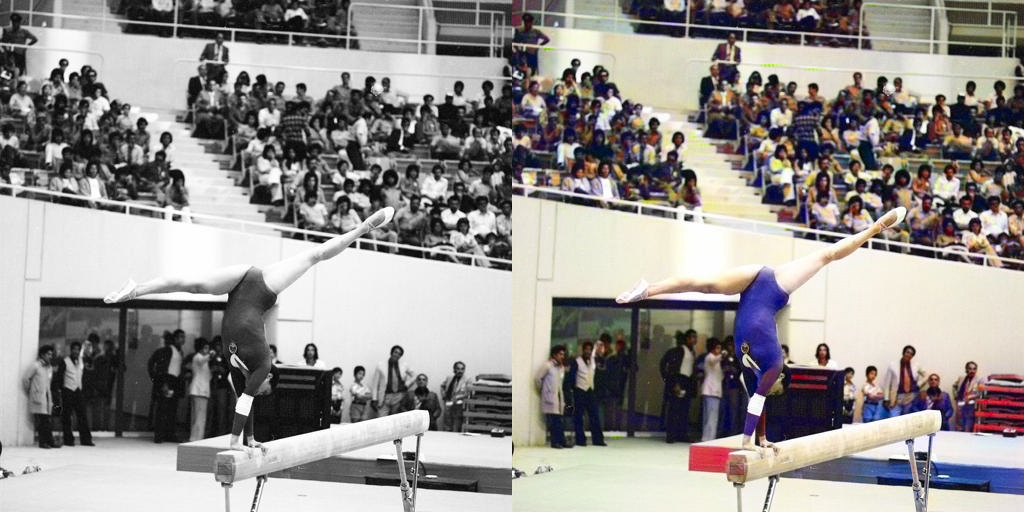

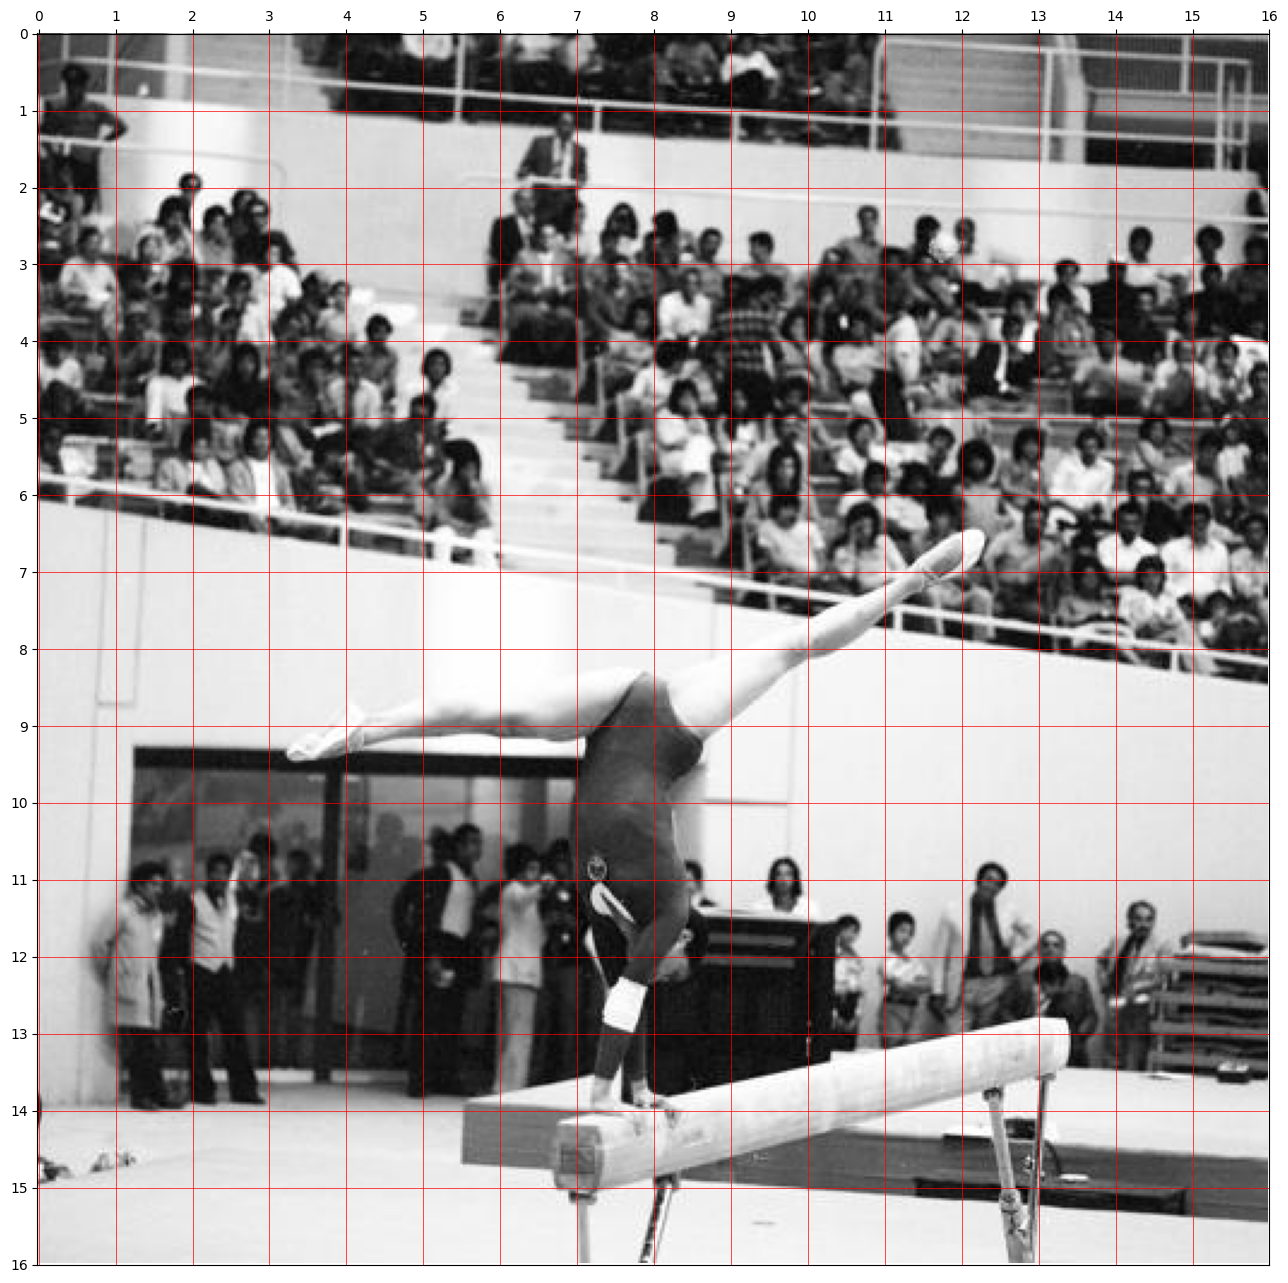

In [23]:
#读取黑白图片以及上一步无参考上色的结果,并查看需要修改的部分
img_gray = cv2.imread('input/10.jpg')
img_rgb = cv2.imread('results/DDC/10.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
display(Image.fromarray(np.concatenate([img_gray, img_rgb], axis=1)))
#画出参考坐标系来获取需要修改颜色的区域
draw_grid(img_gray, fig_size=16)

Step3: 选择需要修改的颜色和点的坐标

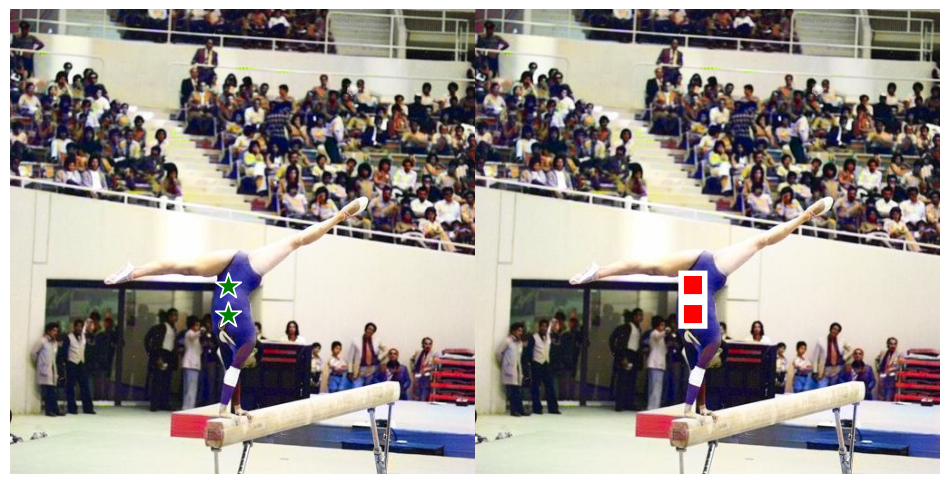

In [24]:
#由于该算法使用256x256大小图像下的16x16的方格作为颜色的提示，选择需要改变颜色的方格的左上格点坐标，以及需要改变成的颜色
h, w, _ = img_gray.shape

# 在上方的网格中指定合适的中心点坐标 
point1_x, point1_y = 10,7
point2_x, point2_t = 9,7

points = [
    {'index': [point1_x*16, point1_y*16], 'color': [255, 0, 0]},
    {'index': [point2_x*16, point2_t*16], 'color': [255, 0, 0]}
]

#选取格点中心作为SAM的提示点
input_points = []
for point in points:
    point_index = point['index']
    input_points.append([(point_index[1] + 8) / 256 * h, (point_index[0] + 8) / 256 * w])
input_points = np.array(input_points)
input_label = np.array([1,1])

#对于unicolor和SAM的提示点可视化评估,左图为SAM的提示点，右图为unicolor的提示方块

point_img = draw_strokes(Image.fromarray(img_rgb), [256, 256], points)
#display(point_img)
plt.figure(figsize=(12,12))
plt.imshow(np.concatenate([img_rgb, np.array(point_img)], axis = 1))
show_points(input_points, input_label, plt.gca())
plt.axis('off')
plt.show()

Step4: 由SAM扩展上色区域

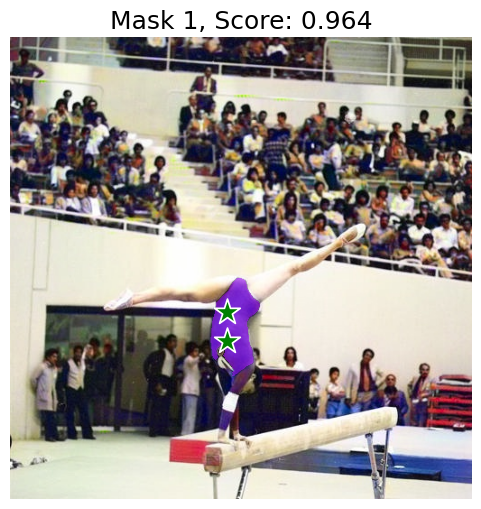

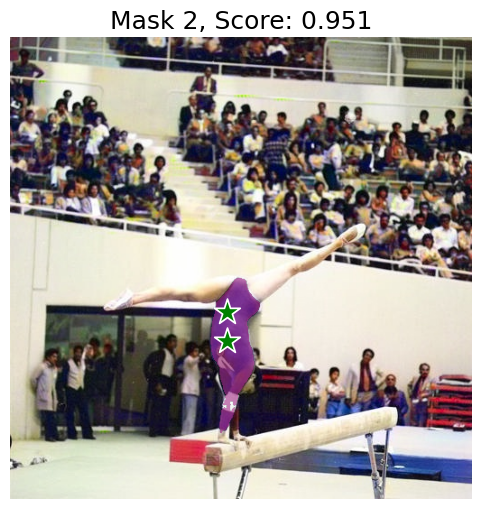

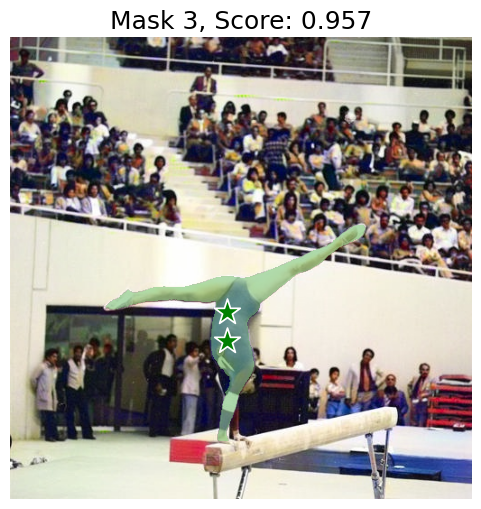

In [25]:
#调用SAM生成多个需要替换颜色部分的蒙版，并选择最贴合替换区域的蒙版，如果无参考上色的图片颜色较为流畅，建议使用上色后图片作为输入
predictor.set_image(img_rgb)
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_label,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    show_mask(mask, plt.gca(),True)
    show_points(input_points, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

Step5: 对指定区域进行上色

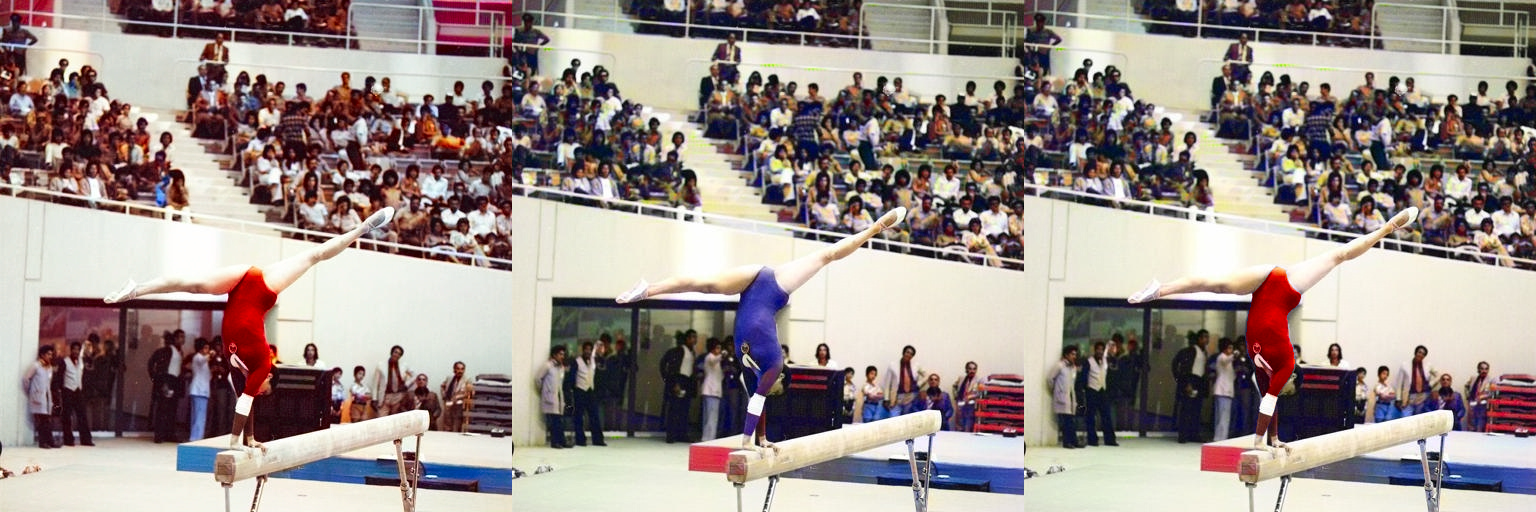

In [26]:
#使用unicolor获取指定区域颜色后的图像并用SAM生成的蒙版替换
I_stk = colorizer.sample(Image.fromarray(img_gray), points, topk=80)
mask = np.zeros(masks[1].shape)
mask[masks[1]] = 1.0
mask = np.stack([mask,mask,mask], axis=2)

I_final = mask * I_stk + (1 - mask) * img_rgb
# 新上色结果 原始上色结果 局部更新后的结果
display(Image.fromarray( np.concatenate([np.array(I_stk), img_rgb, np.uint8(np.array(I_final))], axis=1)))

### 2.5 划痕清理

#### LaMa-inpaint
我们提供一个可视化的界面供您手动标记划痕位置，并通过LaMa算法进行修复。

我们使用里基于Modelscope的LaMa: https://www.modelscope.cn/models/damo/cv_fft_inpainting_lama/summary

##### 快速开始：

Step1: 下载代码及预训练文件，并安装modelscope 环境

In [27]:
! pip install modelscope
download_from_oss('aigc-data/restoration/repo/','inpaint.zip')

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/inpaint.zip
cn-beijing
--2023-08-23 07:10:01--  http://pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com/aigc-data/restoration/repo/inpaint.zip
Resolving pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)... 100.118.58.8, 100.118.58.7, 100.118.58.6, ...
Connecting to pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com (pai-vision-data-bj.oss-cn-beijing-internal.aliyuncs.com)|100.118.58.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603971848 (576M) [application/zip]
Saving to: ‘inpaint.zip’

inpaint.zip         100%[===================>] 575.99M  16.7MB/s    in 42s     

2023-08-23 07:10:44 (13.6 MB/s) - ‘inpai

Step2: 启动UI界面

In [28]:
# result_dir 指定图像保存位置 图像将包存在result_dir/inpaint/da te t
! python inpaint/demo.py --result_dir results

2023-08-23 07:10:53,268 - modelscope - INFO - PyTorch version 1.13.1+cu117 Found.
2023-08-23 07:10:53,269 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2023-08-23 07:10:53,300 - modelscope - INFO - Loading done! Current index file version is 1.8.4, with md5 53b8fdb57a51d8ac873e141c30574f35 and a total number of 902 components indexed
2023-08-23 07:10:54,019 - modelscope - INFO - initiate model from /mnt/workspace/inpaint/pretrain/cv_fft_inpainting_lama
2023-08-23 07:10:54,019 - modelscope - INFO - initiate model from location /mnt/workspace/inpaint/pretrain/cv_fft_inpainting_lama.
2023-08-23 07:10:54,020 - modelscope - INFO - initialize model from /mnt/workspace/inpaint/pretrain/cv_fft_inpainting_lama
2023-08-23 07:10:54,182 - modelscope - INFO - BaseInpaintingTrainingModule init called, predict_only is False
Loading weights for net_encoder
2023-08-23 07:10:55,024 - modelscope - INFO - BaseInpaintingTrainingModule init done
2023-08-23 07:10:55,024 - m

## 3. SD WebUI

我们支持您使用SD Webui 进行交互式的老照片修复任务。

我们预置了老照片修复任务所需的插件，模型，支持一键下载并使用。


#### 快速开始：

Step1: 下载SDWebUI代码及内置的插件、模型

In [ ]:
# 下载大约需要10min
download_from_oss('aigc-data/restoration/repo/','sdwebui.zip')

In [32]:
# 下载Deoldify插件所需模型
! mkdir -p /root/.cache/torch/hub/checkpoints
! wget -P /root/.cache/torch/hub/checkpoints https://pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com/aigc-data/restoration/models/resnet101-63fe2227.pth
! wget -P /root/.cache/torch/hub/checkpoints https://pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com/aigc-data/restoration/models/resnet34-b627a593.pth

--2023-08-23 07:31:03--  https://pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com/aigc-data/restoration/models/resnet101-63fe2227.pth
Resolving pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com (pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com)... 106.14.228.10
Connecting to pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com (pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com)|106.14.228.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178793939 (171M) [application/octet-stream]
Saving to: ‘/root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth.2’

resnet101-63fe2227.  36%[======>             ]  61.52M  18.3MB/s    eta 6s     ^C
--2023-08-23 07:31:07--  https://pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com/aigc-data/restoration/models/resnet34-b627a593.pth
Resolving pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com (pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com)... 106.14.228.10
Connecting to pai-vision-data-sh.oss-cn-shanghai.aliyuncs.com (pai-vision-data-sh.oss

Step2: 启动SD WebUI

In [31]:
# use for gradio preview
! mkdir -p /tmp/gradio

# start sdwebui
! cd stable-diffusion-webui && python -m venv --system-site-packages --symlinks venv
! cd stable-diffusion-webui && \
  sed -i 's/can_run_as_root=0/can_run_as_root=1/g' webui.sh && \
  ./webui.sh --no-download-sd-model --xformers --gradio-queue  --disable-safe-unpickle

Unable to symlink '/usr/bin/python' to '/mnt/workspace/stable-diffusion-webui/venv/bin/python'

################################################################
Install script for stable-diffusion + Web UI
Tested on Debian 11 (Bullseye)
################################################################

################################################################
Running on root user
################################################################

################################################################
Repo already cloned, using it as install directory
################################################################

################################################################
Create and activate python venv
################################################################

################################################################
Launching launch.py...
################################################################
Cannot locate TCMalloc (improves CPU memory usa